In [2]:
from fastai.vision import *

import warnings
warnings.filterwarnings("ignore")

In [3]:
data_path = Path('./chest_xray').absolute()
model_path = Path('./model').absolute()

In [4]:
data = ImageDataBunch.from_folder(data_path,
                                  valid = 'test',
                                  size=256,
                                  ds_tfms=get_transforms()
                                 ).normalize(imagenet_stats)

In [5]:
print(data.classes, len(data.train_ds), len(data.valid_ds))

['BACTERIA', 'NORMAL', 'VIRUS'] 5232 624


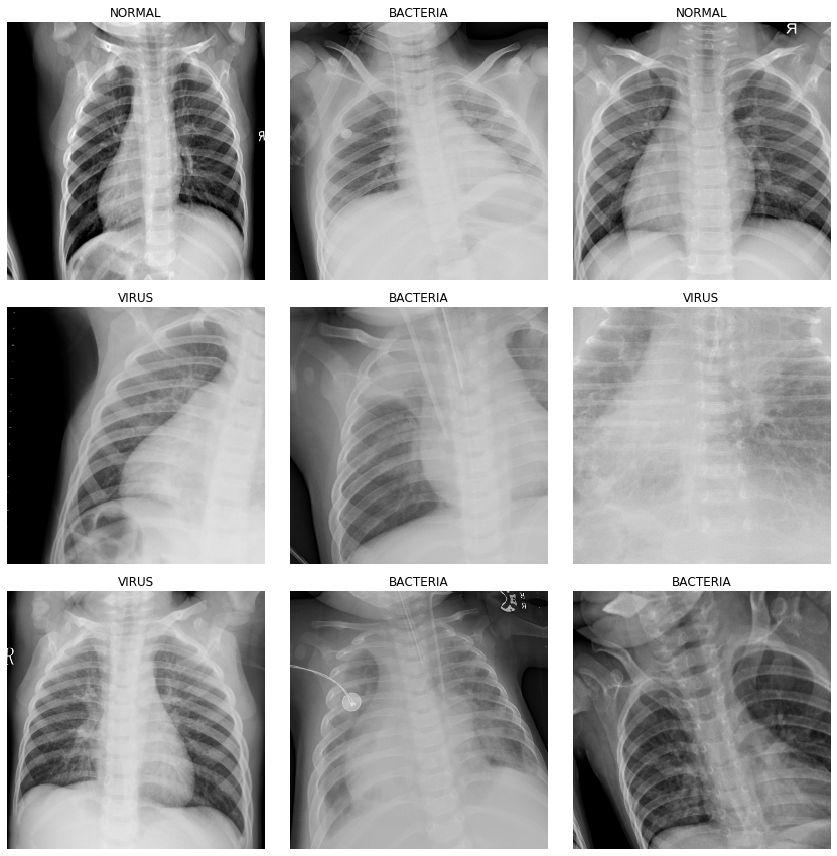

In [6]:
data.show_batch(rows=3)

In [7]:
learn = cnn_learner(data, 
                    models.resnet50, 
                    metrics=error_rate, 
                    model_dir=model_path)

learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.984596,0.824427,0.243590,00:44
1,0.709081,0.672590,0.232372,00:44
2,0.581670,0.567941,0.168269,00:44
3,0.514850,0.561444,0.179487,00:43
4,0.495024,0.593524,0.190705,00:44


In [8]:
learn.unfreeze()

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


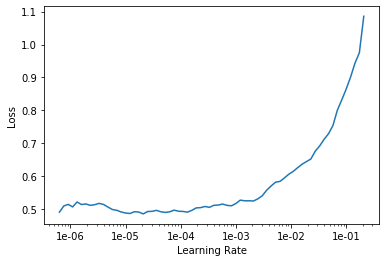

In [10]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(5, max_lr=3e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.481067,0.653320,0.209936,00:45
1,0.489330,0.800703,0.232372,00:44
2,0.429111,0.586336,0.189103,00:45
3,0.389039,0.469231,0.145833,00:45
4,0.340125,0.470143,0.134615,00:45


In [12]:
learn.export(model_path / 'export.pkl')
learn.save(model_path / 'pneumonia')